#  MULITCLASS LOGISTIC REGRESSION 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data=data.drop(['Id'],axis=1) # removing ID column

<AxesSubplot:>

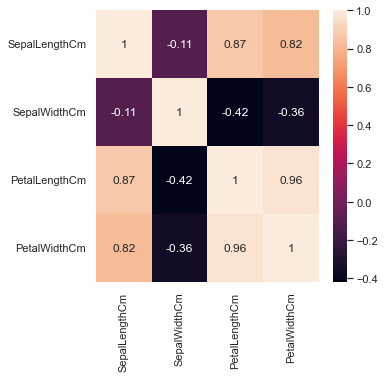

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(data.corr(),annot=True) # printing correlation graph

In [39]:
def SplitDataSet(X,y,p=0.8):  # function to split data set
    n,_=X.shape
    train_idxs=random.sample(range(0,n-1),int(np.ceil(p*n)))  # generating random numbers 
    train_idxs=np.sort(train_idxs)
    X_train=X[train_idxs]
    y_train=y[train_idxs]
    test_idxs=[i for i in range(n) if i not in train_idxs]
    X_test=X[test_idxs]
    y_test=y[test_idxs]
    return X_train,y_train,X_test,y_test
def ConvertTextLabeltoNumeric(y): # function to convert text label to numeric label 
    unq_arr=np.unique(y)
    D={};
    j=0
    for i in unq_arr:
        D[i]=j
        j+=1
    for i in range(len(y)):
        y[i]=D[y[i]]
    return y
def OneHotEncoded(y): # one hot encoding . ex: 3 -> [0,0,0,1]
    m=np.max(y)
    ans=np.zeros((len(y),m+1))
    for i in range(len(y)):
        ans[i][y[i]]=1
    return ans

In [132]:
class MulitClassLogReg:
    def __init__(self):
        self.cost_arr=[]
        pass
    
    def getH(self,X):
        # theta shape : (m+1)*c ; c-> number of diff labels
        # X shape : n*(m+1) ;
        z=np.exp(X@self.theta)
        s=np.sum(z,axis=1)
        s=s.reshape(len(s),-1)
        h=z/s
        return h
    
    def getLoss(self,X,y):
        n=y.shape[0]
        cost=(-1/n)*np.sum(np.log(np.sum(y*self.getH(X),axis=1)))
        return cost
    
    def plotCost(self):
        fig=plt.figure(figsize=(5,5))
        epochs_arr=np.arange(len(self.cost_arr))
        plt.plot(epochs_arr,self.cost_arr)
        plt.xlabel("Number of Epochs")
        plt.ylabel("CROSS ENTRPOY LOSS")
        plt.title("CROSS ENTRPOY LOSS vs Number of Iterations")   
        
    def fit(self,X,y,num_epochs=150,alpha=0.1,lamda=0.01):
        self.theta=np.zeros((X.shape[1],y.shape[1]))
        n=y.shape[0]
        for i in range(num_epochs):
            h=self.getH(X)
            self.theta=self.theta+alpha*(1/n)*(X.T @ (y-h))+2*lamda*self.theta
            self.cost_arr.append(self.getLoss(X,y))
        """
        # expanded version
        for e in range(num_epochs):
            h=self.getH(X)
            for a in range(X.shape[1]):
                for b in range(y.shape[1]):
                    temp=0
                    # ath feature and bth class
                    for i in range(n):
                        temp+=((y[i][b]*h[i][b]*(1-h[i][b])*X[i][a])/(np.sum(y[i]*h[i])))
                    self.theta[a][b]+=((alpha/n)*temp+2*alpha*lamda*self.theta[a][b])
            self.cost_arr.append(self.getLoss(X,y))  
         """   
    def predict(self,X):
        return np.argmax(self.getH(X),axis=1)

Cost for train Data = 0.12433534944103204


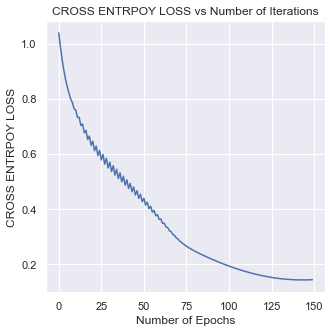

In [133]:
# ------------ preprocessing data ---------------------
X=data.iloc[:,:-2].to_numpy()
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1)
y=data.iloc[:,-1].to_numpy()
y=ConvertTextLabeltoNumeric(y)
y=OneHotEncoded(y)
X_train,y_train,X_test,y_test=SplitDataSet(X,y)

#------------ training and testing model ----------------
reg=MulitClassLogReg()
reg.fit(X_train,y_train) # fitting data to model
reg.plotCost()
cost=reg.getLoss(X,y)
print("Cost for train Data = {}".format(cost))

In [134]:
y_pred=reg.predict(X_test)
cost=reg.getLoss(X_test,y_test)
print("predicted : ",y_pred)
print("Actual    : ",np.argmax(y_test,axis=1))
print("RMS error is : ",np.mean(((y_pred)-np.argmax(y_test,axis=1))**2))
print("Cost for test Data = {}".format(cost))

predicted :  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
Actual    :  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
RMS error is :  0.0
Cost for test Data = 0.050662294470622586


# SUPPORT VECTOR MACHINES (SVM)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
data=pd.read_csv("iris.csv")
data=data.drop(['Id'],axis=1) # removing ID column
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
data=data[data["Species"]!='Iris-virginica']  # removing Iris-virginica class

In [100]:
def SplitDataSet(X,y,p=0.8):  # function to split data set
    n,_=X.shape
    train_idxs=random.sample(range(0,n-1),int(np.ceil(p*n)))  # generating random numbers 
    train_idxs=np.sort(train_idxs)
    X_train=X[train_idxs]
    y_train=y[train_idxs]
    test_idxs=[i for i in range(n) if i not in train_idxs]
    X_test=X[test_idxs]
    y_test=y[test_idxs]
    return X_train,y_train,X_test,y_test
def ConvertTextLabeltoNumeric(y):  # function to convert text label to numeric label 
    unq_arr=np.unique(y)
    D={};
    j=-1
    for i in unq_arr:
        D[i]=j
        j+=2
    for i in range(len(y)):
        y[i]=D[y[i]]
    return D,y

In [110]:
class SVM:

    def __init__(self,kernel="linear",degree=1):
        self.kernel=kernel
        self.degree=degree
        pass
    def Kernel(self,x1,x2,r=1):
        if(self.kernel=="linear"): return np.dot(x1,x2)
        return (np.dot(x1,x2)+r)**self.degree
    def gradient(self,X,y,C=1000):
        dw=np.zeros(X.shape[1])
        for i in range(len(y)):
            if(y[i]*self.Kernel(self.W,X[i])>=1):
                dw+=self.W
            else :
                dw+=(self.W-C*X[i]*y[i])
        return dw
    def PlotBias(self,y):
        y_unq,counts=np.unique(y,return_counts=True)
        x=["-ve","+ve"]
        plt.title("Number of Samples")
        plt.bar(x,counts,color=["r","b"])
    def RMSError(self,X,y):
        y_pred=np.where((self.Kernel(X,self.W)>0),1,-1)
        return np.mean((y-y_pred)**2)
    def fit(self,X,y,alpha=0.0001,epochs=500):
        self.W=np.ones(X.shape[1])
        for e in range(epochs):
            self.W=self.W-alpha*self.gradient(X,y)
    
    def predict(self,X,D):
        temp=self.Kernel(X,self.W)
        return np.where(temp>0,D[1],D[-1])


LINEAR KERNEL : RMS ERROR for training data =  0.0
LINEAR KERNEL : RMS ERROR for testing data =  0.0


POLYNOMIAL KERNEL with degree 2 : RMS ERROR for training data = 1.95
POLYNOMIAL KERNEL with degree 2 : RMS ERROR for testing data = 1.95


POLYNOMIAL KERNEL with degree 3 : RMS ERROR for training data = 0.0
POLYNOMIAL KERNEL with degree 3 : RMS ERROR for testing data = 0.0


POLYNOMIAL KERNEL with degree 4 : RMS ERROR for training data = 1.95
POLYNOMIAL KERNEL with degree 4 : RMS ERROR for testing data = 1.95




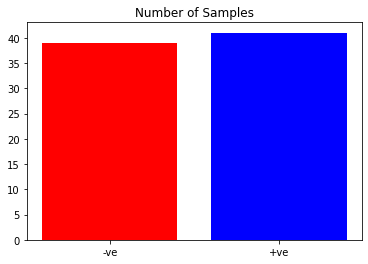

In [117]:
# ------------ preprocessing data ---------------------
X=data.iloc[:,:-2].to_numpy()
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1)
y=data.iloc[:,-1].to_numpy()
D,y=ConvertTextLabeltoNumeric(y)
X_train,y_train,X_test,y_test=SplitDataSet(X,y)

# ----------------- LINEAR KERNEL SVM model -------------------
model=SVM()
model.fit(X_train,y_train)
model.PlotBias(y_train)   # plotting number of +ve samples and number of -ve samples to check whether data is biased or not
y_predict=model.predict(X_test,y_test)
train_rms=model.RMSError(X_train,y_train)
test_rms=model.RMSError(X_test,y_test)
print("LINEAR KERNEL : RMS ERROR for training data = ",train_rms)
print("LINEAR KERNEL : RMS ERROR for testing data = ",test_rms)
print("\n")

# ----------------- POLYNOMIAL KERNEL SVM model ------------
for d in range(2,5):
    model1=SVM("polynomial",d)
    model1.fit(X_train,y_train)
    y_predict=model1.predict(X_test,y_test)
    train_rms=model1.RMSError(X_train,y_train)
    test_rms=model1.RMSError(X_test,y_test)
    print("POLYNOMIAL KERNEL with degree {} : RMS ERROR for training data = {}".format(d,train_rms))
    print("POLYNOMIAL KERNEL with degree {} : RMS ERROR for testing data = {}".format(d,train_rms))
    print("\n")